## ML exsperiment on fitness movments and IMU
The aim is to classify human cycle movements (e.g. "Squats, Biceps) by using an Acceleromter wrist sensor

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [60]:

# Load the CSV dataset
df = pd.read_csv('dataset.csv')
df = df.drop(['mov', 'prob'], axis=1)

df.head()

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc,target
0,1672219680258,9.936936,1.161584,2.071692,-1.05,0.91,0.56,-6.528250,78.223439,0.001953,10.216843,0
1,1672219680365,9.877061,1.396297,2.071692,0.21,1.05,-0.21,-7.877258,78.154060,0.006836,10.188125,0
2,1672219680470,9.982442,1.192720,1.956731,-0.49,0.63,0.07,-6.687422,78.909651,0.022949,10.242096,0
3,1672219680574,9.901011,1.219065,2.335144,0.28,-0.35,0.56,-6.833591,76.729357,0.036621,10.245440,0
4,1672219680683,9.908196,1.403481,2.222578,0.21,-0.07,0.21,-7.869216,77.356862,0.037842,10.250950,0


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [34]:
df.describe()
X = df.drop('target', axis=1)
y = df['target']


In [43]:
X

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc
0,1672219680258,9.936936,1.161584,2.071692,-1.050000,0.910000,0.560000,-6.528250,78.223439,0.001953,10.216843
1,1672219680365,9.877061,1.396297,2.071692,0.210000,1.050000,-0.210000,-7.877258,78.154060,0.006836,10.188125
2,1672219680470,9.982442,1.192720,1.956731,-0.490000,0.630000,0.070000,-6.687422,78.909651,0.022949,10.242096
3,1672219680574,9.901011,1.219065,2.335144,0.280000,-0.350000,0.560000,-6.833591,76.729357,0.036621,10.245440
4,1672219680683,9.908196,1.403481,2.222578,0.210000,-0.070000,0.210000,-7.869216,77.356862,0.037842,10.250950
...,...,...,...,...,...,...,...,...,...,...,...
865,1672219772618,9.453142,0.316143,3.963758,-0.350000,-7.699997,-3.009999,-1.766533,67.251412,-0.041748,10.255399
866,1672219772725,9.441168,0.457449,3.654800,-0.210000,-2.939999,2.309999,-2.587154,68.837926,-0.054199,10.134223
867,1672219772833,9.565708,0.694556,3.520679,2.309999,-6.299998,-0.630000,-3.898122,69.793757,-0.043945,10.216671
868,1672219772940,9.501043,0.481399,3.614085,1.679999,-3.849999,-0.560000,-2.711360,69.173776,-0.037354,10.176600


In [41]:
y.value_counts()

0    587
1    283
Name: target, dtype: int64

In [39]:
#UNDERSAMPLE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [40]:
y_resampled.value_counts()

0    283
1    283
Name: target, dtype: int64

In [62]:
df_scaled.describe()

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc,target
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.500570,0.374455,0.768465,0.511305,0.429789,0.587617,0.461010,0.250207,0.462519,0.241305,0.371097,0.325287
std,0.289164,0.127832,0.060761,0.119487,0.033448,0.104113,0.052500,0.056794,0.117337,0.105819,0.131960,0.468752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250469,0.311773,0.741387,0.416964,0.425388,0.531575,0.436816,0.225153,0.383762,0.191722,0.317747,0.000000
50%,0.500846,0.384114,0.771042,0.512662,0.430163,0.589868,0.459702,0.246154,0.448588,0.232671,0.376402,0.000000
75%,0.751137,0.428085,0.799717,0.595779,0.434739,0.639833,0.479602,0.271701,0.544705,0.275938,0.428282,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


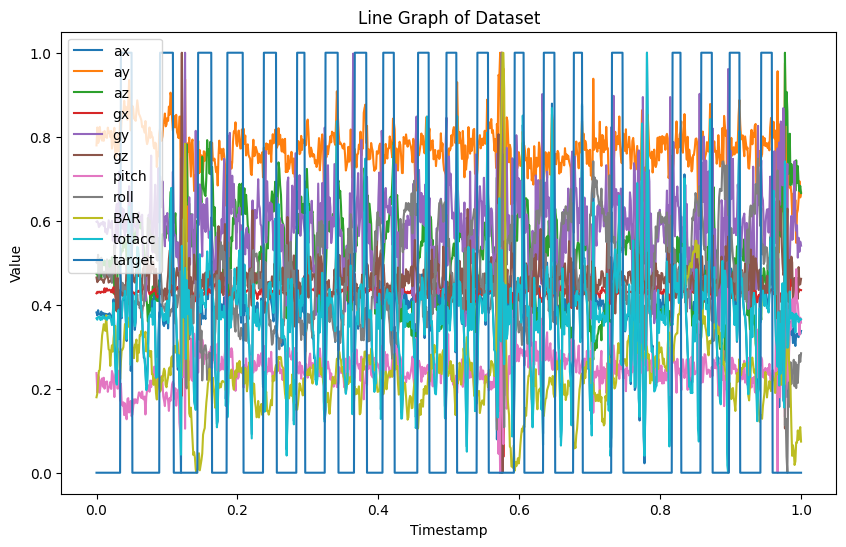

In [63]:
import matplotlib.pyplot as plt

# Set the timestamp column as the index
df_scaled.set_index('timestamp', inplace=True)

# Plot a line graph for each column in the dataset
plt.figure(figsize=(10, 6))
for column in df_scaled.columns:
    if column != 'timestamp':
        plt.plot(df_scaled.index, df_scaled[column], label=column)

# Set the title, axis labels, and legend
plt.title('Line Graph of Dataset')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()


Decision Tree:
Accuracy: 0.7126
Precision: 0.5926
Recall: 0.5333
F1 score: 0.5614
-_-_-_-_-_-_-_
Random Forest:
Accuracy: 0.7701
Precision: 0.7174
Recall: 0.5500
F1 score: 0.6226
-_-_-_-_-_-_-_
Naive Bayes:
Accuracy: 0.6839
Precision: 0.5243
Recall: 0.9000
F1 score: 0.6626
-_-_-_-_-_-_-_
Support Vector Machine:
Accuracy: 0.7989
Precision: 0.7358
Recall: 0.6500
F1 score: 0.6903
-_-_-_-_-_-_-_
XGBoost:
Accuracy: 0.8103
Precision: 0.7213
Recall: 0.7333
F1 score: 0.7273
-_-_-_-_-_-_-_
Logistic Regression:
Accuracy: 0.7011
Precision: 0.6667
Recall: 0.2667
F1 score: 0.3810
-_-_-_-_-_-_-_


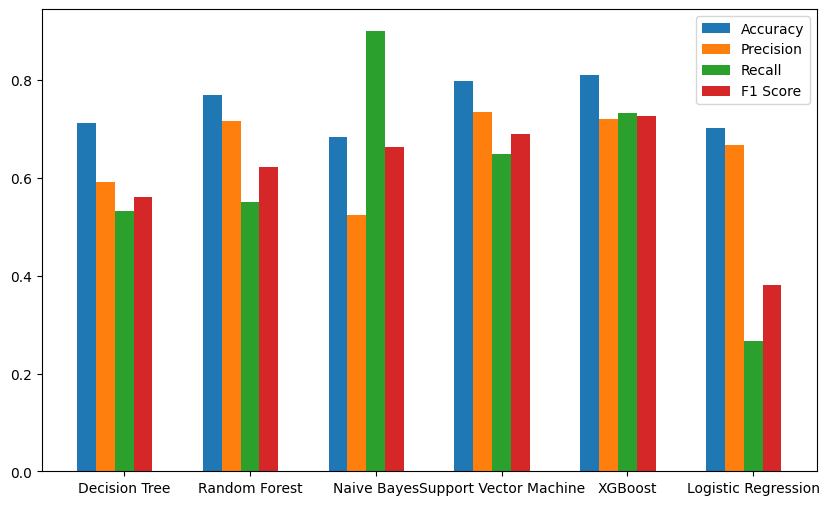

Decision Tree


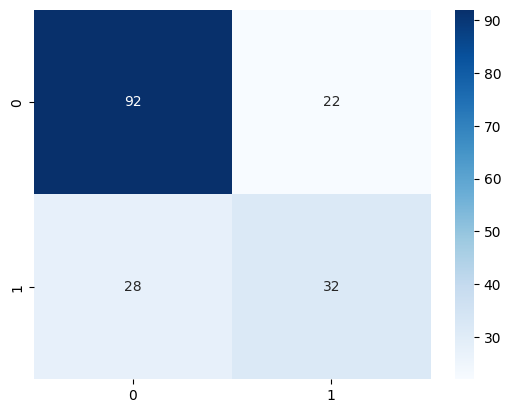

Random Forest


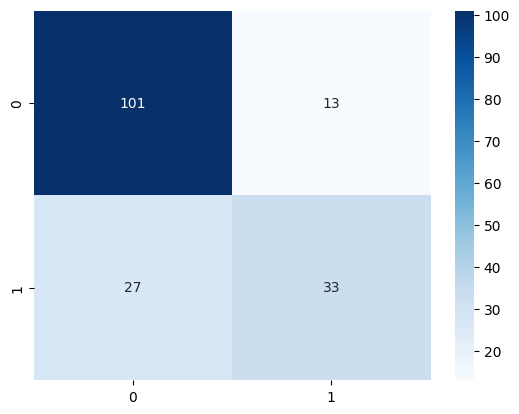

Naive Bayes


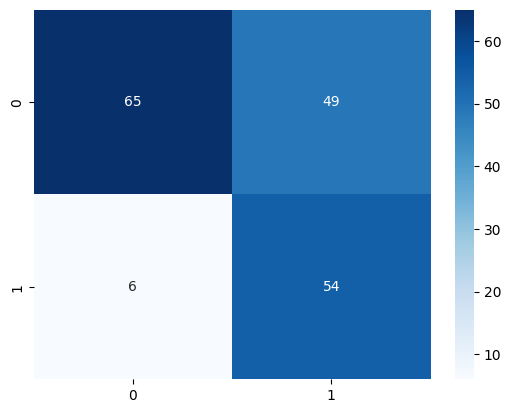

Support Vector Machine


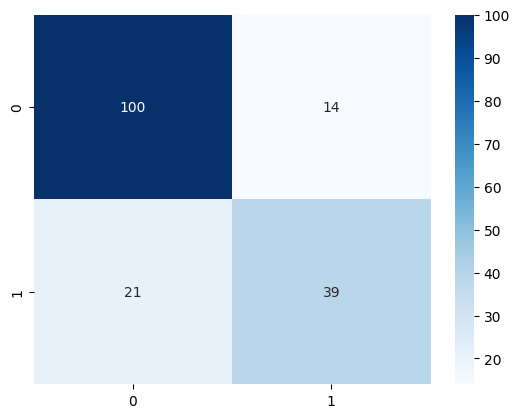

XGBoost


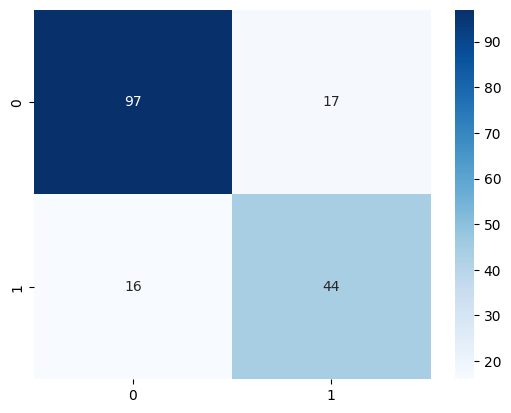

Logistic Regression


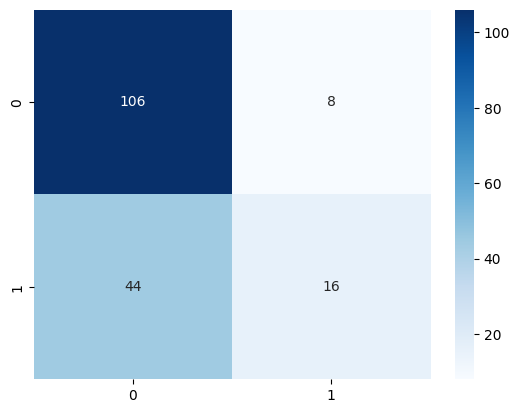

In [64]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('target', axis=1), df_scaled['target'], test_size=0.2)

# Define the classification models to use
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('XGBoost', XGBClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append((name, accuracy, precision, recall, f1, cm))

    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print("-_-_-_-_-_-_-_")

# Plot the evaluation results as a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [result[i+1] for result in results]
    rects = ax.bar(x + (i * width), values, width, label=metric)
    
    # Add labels for small values
    for rect in rects:
        height = rect.get_height()
        if height < 0.1:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

ax.set_xticks(x + (2 * width))
ax.set_xticklabels([name for name, _ in models])
ax.legend()

plt.show()

# Print the confusion matrix for each model
for name, _, _, _, _, cm in results:
    print(name)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.show()